<a href="https://colab.research.google.com/github/rajeshpahari/Own-Work/blob/ML/Ml001_Regularizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regularizatins

In [151]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')
import seaborn as sns


In [152]:
# from google.colab import files
# files.upload()

# !pip install kaggle
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle
# !chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets download -d 'amitabhajoy/bengaluru-house-price-data'
# !unzip /content/bengaluru-house-price-data.zip


# Data Import & Observations and select data for OLS

In [153]:
df=pd.read_csv('/content/Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [154]:
df=df[['size','price']]
df.head()

,size,price
0,2 BHK,39.07
1,4 Bedroom,120.00
2,3 BHK,62.00
3,3 BHK,95.00
4,2 BHK,51.00


In [155]:
#Any empty data??
df.isnull().sum()

size     16
price     0
dtype: int64

In [156]:
#remove empty data
df.dropna(inplace=True)
df.isnull().sum()

size     0
price    0
dtype: int64

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13304 entries, 0 to 13319
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    13304 non-null  object 
 1   price   13304 non-null  float64
dtypes: float64(1), object(1)
memory usage: 311.8+ KB


In [158]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [159]:
#make size numerical by removing unwanted data
df['size']=df['size'].apply(lambda x: int(str(x).split(' ')[0]))

In [160]:
#Check conversion
df['size'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [161]:
#Find corelation of size and price
df.corr()

,size,price
size,1.000000,0.398292
price,0.398292,1.000000


<AxesSubplot:>

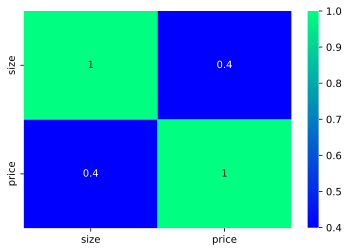

In [162]:
#Plot it
sns.heatmap(df.corr(),annot=True,cmap='winter')
#Only 40% relation

# Data Split

In [163]:
X=df.drop('price',axis=1)
y=df['price']
X.shape,y.shape

((13304, 1), (13304,))

In [164]:
from sklearn.model_selection import train_test_split

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10643, 1), (2661, 1), (10643,), (2661,))

# Model Building and fitting

In [166]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

# Model Performance

In [167]:
#Evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('Evaluation of Model with No parameter')
print('*****************')
print('-----------------')
print('*****************\n')
print('Model Score- Training:',model.score(X_train,y_train))
print('Model Score- Testing:',model.score(X_test,y_test))
print('-----------------')
print('Mean Absolute Error:Train:',mean_absolute_error(y_train,model.predict(X_train)))
print('Mean Absolute Error:Test:',mean_absolute_error(y_test,model.predict(X_test)))

print('-----------------')
print('RMSE:Train:',np.sqrt(mean_squared_error(y_train,model.predict(X_train))))
print('RMSE:Test:',np.sqrt(mean_absolute_error(y_test,model.predict(X_test))))

Evaluation of Model with No parameter
*****************
-----------------
*****************

Model Score- Training: 0.15631999996425894
Model Score- Testing: 0.16779503493874404
-----------------
Mean Absolute Error:Train: 59.64386003471125
Mean Absolute Error:Test: 59.213846874311756
-----------------
RMSE:Train: 137.88282976490402
RMSE:Test: 7.695053402953858


In [168]:
#very Poor...Can we Apply Polinonimal regression

# Create Polynomial Features- Kind of features scaling#

In [169]:

X=df.drop('price',axis=1)
y=df['price']
X.shape,y.shape
from sklearn.preprocessing import PolynomialFeatures
scalar=PolynomialFeatures(degree=2,include_bias=False)
#What is interaction???

X_transform=scalar.fit_transform(X) # Dont need to apply train or test..do it for both
X_transform.shape

(13304, 2)

In [170]:
#Check
df.iloc[0]

size      2.00
price    39.07
Name: 0, dtype: float64

In [171]:
#Check with degree 2
#scalar[0]

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10643, 2), (2661, 2), (10643,), (2661,))

In [173]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [174]:
#Evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('Evaluation of Model with No parameter')
print('*****************')
print('-----------------')
print('*****************\n')
print('Model Score- Training:',model.score(X_train,y_train))
print('Model Score- Testing:',model.score(X_test,y_test))
print('-----------------')
print('Mean Absolute Error:Train:',mean_absolute_error(y_train,model.predict(X_train)))
print('Mean Absolute Error:Test:',mean_absolute_error(y_test,model.predict(X_test)))

print('-----------------')
print('RMSE:Train:',np.sqrt(mean_squared_error(y_train,model.predict(X_train))))
print('RMSE:Test:',np.sqrt(mean_absolute_error(y_test,model.predict(X_test))))

Evaluation of Model with No parameter
*****************
-----------------
*****************

Model Score- Training: 0.1767549414275017
Model Score- Testing: 0.17388006158298352
-----------------
Mean Absolute Error:Train: 59.45182882142746
Mean Absolute Error:Test: 59.26702509542238
-----------------
RMSE:Train: 136.44884561564538
RMSE:Test: 7.698507978525604


# Feature Scaling

In [175]:
df.head()

,size,price
0,2,39.07
1,4,120.00
2,3,62.00
3,3,95.00
4,2,51.00


<AxesSubplot:>

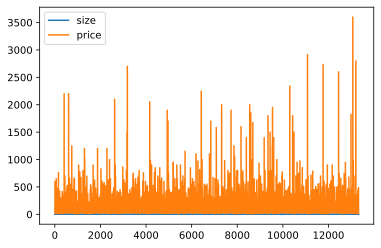

In [176]:
df.plot()

In [177]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)


<AxesSubplot:>

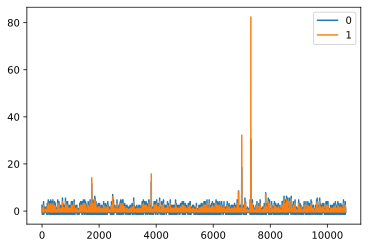

In [178]:
#Observe scaled features
pd.DataFrame(X_train).plot()

In [179]:
from sklearn.linear_model import Ridge
model=Ridge(alpha=10)
model.fit(X_train,y_train)

Ridge(alpha=10)

In [180]:
#Evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('Evaluation of Model with No parameter')
print('*****************')
print('-----------------')
print('*****************\n')
print('Model Score- Training:',model.score(X_train,y_train))
print('Model Score- Testing:',model.score(X_test,y_test))
print('-----------------')
print('Mean Absolute Error:Train:',mean_absolute_error(y_train,model.predict(X_train)))
print('Mean Absolute Error:Test:',mean_absolute_error(y_test,model.predict(X_test)))

print('-----------------')
print('RMSE:Train:',np.sqrt(mean_squared_error(y_train,model.predict(X_train))))
print('RMSE:Test:',np.sqrt(mean_absolute_error(y_test,model.predict(X_test))))

Evaluation of Model with No parameter
*****************
-----------------
*****************

Model Score- Training: 0.17675395419378426
Model Score- Testing: -4.22821436586013
-----------------
Mean Absolute Error:Train: 59.44533475197252
Mean Absolute Error:Test: 154.6470850701575
-----------------
RMSE:Train: 136.4489274302031
RMSE:Test: 12.43571811638385


# Lets Apply cross validations

In [181]:
from sklearn.linear_model import RidgeCV
model=RidgeCV(alphas=(.1,.5,1,5,10),cv=10)
model.fit(X_train,y_train) #here X_train will be devided for internal evaluation

RidgeCV(alphas=(0.1, 0.5, 1, 5, 10), cv=10)

In [182]:
model.alpha_

10.0

In [183]:
model.coef_

array([ 82.36446055, -30.81574768])

In [184]:
#from sklearn.metrics import SCORERS


In [185]:
#SCORERS.keys()

# Lasso regression

In [186]:
from sklearn.linear_model import LassoCV

In [187]:
model=LassoCV(eps=.1,n_alphas=100,cv=5,max_iter=10000)
model.fit(X_train,y_train)

LassoCV(cv=5, eps=0.1, max_iter=10000)

In [188]:
model.alpha_

5.967336585259858

In [189]:
model.coef_

array([59.72679032, -8.15132564])

In [190]:
from sklearn.linear_model import Lasso
model=Lasso(alpha=model.alpha_)
model.fit(X_train,y_train)

Lasso(alpha=5.967336585259858)

In [191]:
#Evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('Evaluation of Model with No parameter')
print('*****************')
print('-----------------')
print('*****************\n')
print('Model Score- Training:',model.score(X_train,y_train))
print('Model Score- Testing:',model.score(X_test,y_test))
print('-----------------')
print('Mean Absolute Error:Train:',mean_absolute_error(y_train,model.predict(X_train)))
print('Mean Absolute Error:Test:',mean_absolute_error(y_test,model.predict(X_test)))

print('-----------------')
print('RMSE:Train:',np.sqrt(mean_squared_error(y_train,model.predict(X_train))))
print('RMSE:Test:',np.sqrt(mean_absolute_error(y_test,model.predict(X_test))))

Evaluation of Model with No parameter
*****************
-----------------
*****************

Model Score- Training: 0.16469224539382876
Model Score- Testing: -0.4744452076882555
-----------------
Mean Absolute Error:Train: 59.76266169222814
Mean Absolute Error:Test: 136.05544151498785
-----------------
RMSE:Train: 137.44487672920027
RMSE:Test: 11.664280582830123


In [192]:
model.coef_

array([59.72679032, -8.15132564])